In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)

In [2]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[3]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'toolsdata/bursi.pos.gspan'

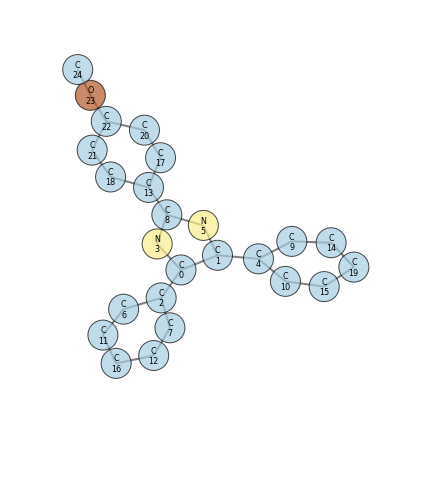

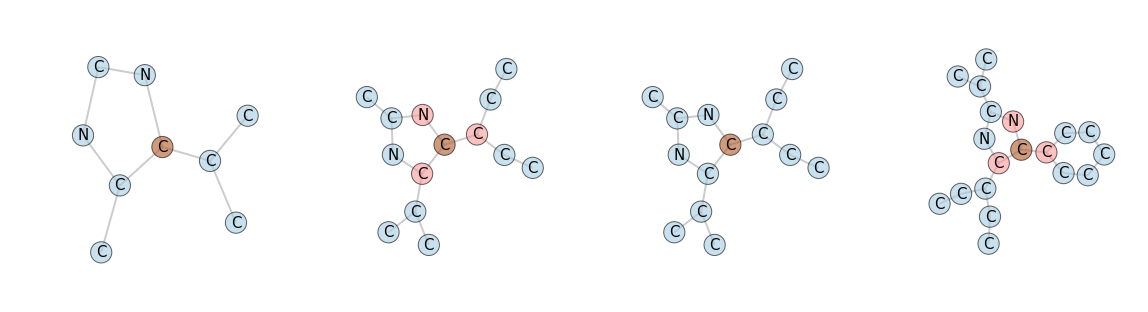

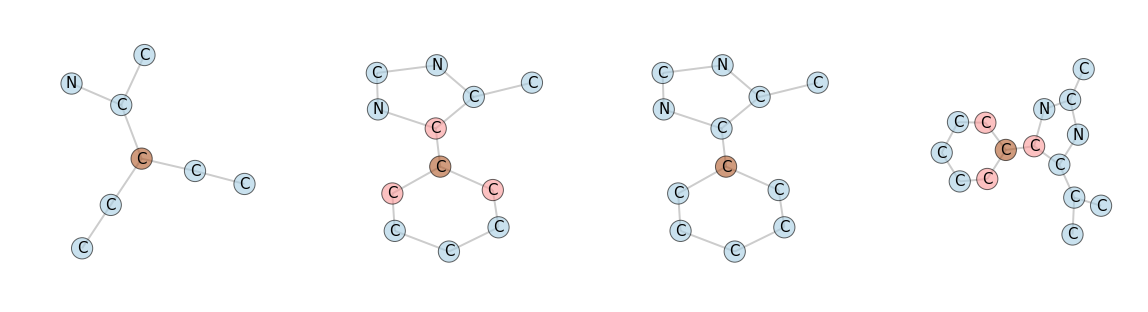

In [3]:
'''
first we test the core/interface extractor, since it is most essential
'''
from graphlearn.utils.draw import  cip_to_drawable_graph, graphlearn
import  graphlearn.graph as tools
from eden.graph import Vectorizer
vectorizer=Vectorizer()

def draw(cips):
    graphs=cip_to_drawable_graph(cips)
    graphlearn(graphs,
              n_graphs_per_line=7, size=5, 
              colormap='Paired', invert_colormap=False,node_border=1,
              vertex_alpha=0.6, edge_alpha=0.2, node_size=450)

#get a graph
graphs = get_graphs(dataset_fname)
graph = next(graphs)
graphlearn(graph, size=8, font_size=8, secondary_vertex_label='ID',
        colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
        vertex_alpha=0.7, node_size=900)

# what do we want to extract
radius_list=[0,1]
thickness_list=[2,3]

#extract directly
cips=tools.extract_core_and_interface(1,graph,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
draw(cips)

#extract via graphwrapper
graph= tools.Wrapper(graph,vectorizer)
cips=graph.rooted_core_interface_pairs(2,radius_list=radius_list,thickness_list=thickness_list)
draw(cips)


We work on this graph


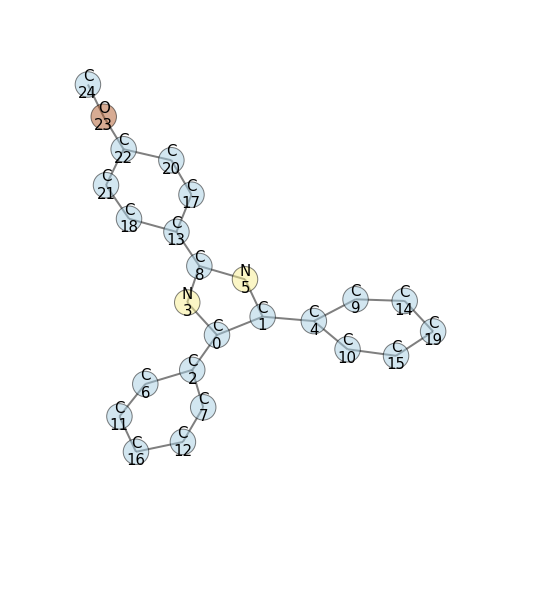

no filter


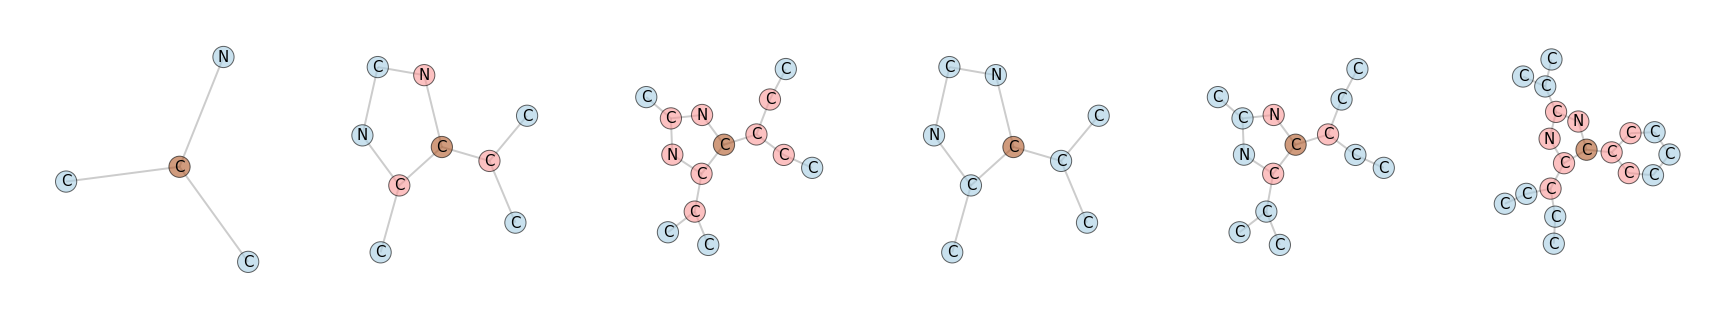

with filter: nothing should appear,,,
with filter but we chose node 2 as root


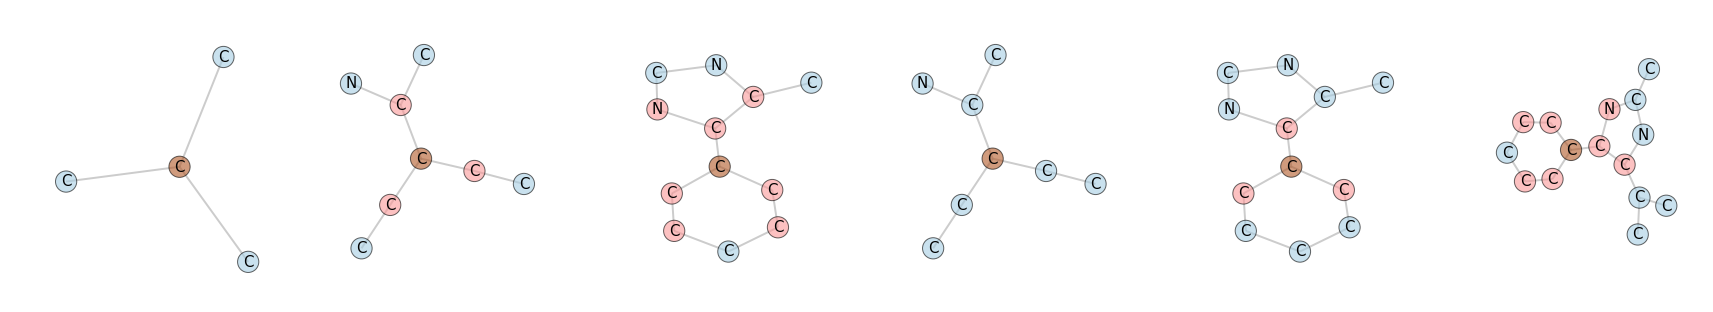

with filter but node "1" cant be part of a core, we gave 0 and 2 as radius list and only radius 2 will show up


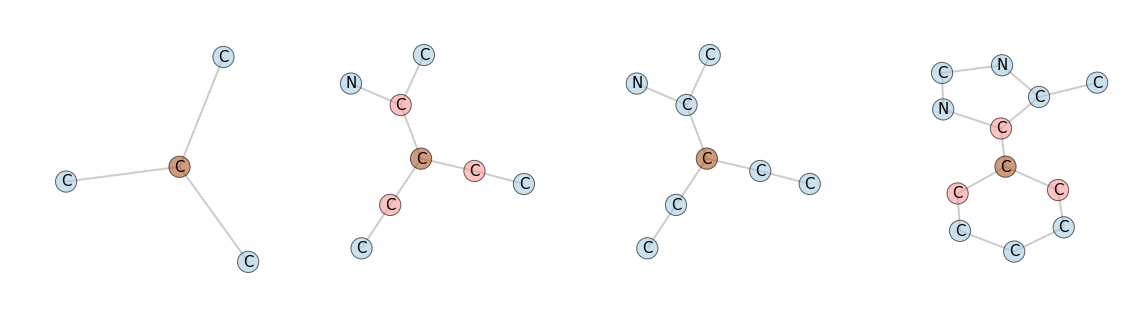

In [4]:
'''
Demonstrating the filter function
'''
#get a graph
graphs = get_graphs(dataset_fname, size=1)
graph = next(graphs)
import  graphlearn.utils.draw as draw
import  graphlearn.graph as tools

print 'We work on this graph'
draw.graphlearn(graph, size=10, secondary_vertex_label='ID',
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                   vertex_alpha=0.5, node_size=650)

def show(cips):
    graphs=draw.cip_to_drawable_graph(cips)
    draw.graphlearn(graphs, n_graphs_per_line=7, size=5,
                              colormap='Paired', invert_colormap=False,node_border=1,
                              vertex_alpha=0.6, edge_alpha=0.2, node_size=450)
    
radius_list=[0,1,2]
thickness_list=[1,2]
graph.node[1]['no_root']=True
#lets see.. without filter:

cips=tools.extract_core_and_interface(1,graph,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'no filter'
show(cips)


# lets do the same but with the filter
cips=tools.extract_core_and_interface(1,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter: nothing should appear,,,'
show(cips)

# filter is ignoring unfiltered things:
cips=tools.extract_core_and_interface(2,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but we chose node 2 as root'
show(cips)

# no core attribute
graph.node[1]["not_in_core"]=True
graph.node[1].pop('no_root')
cips=tools.extract_core_and_interface(2,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but node "1" cant be part of a core, we gave 0 and 2 as radius list and only radius 2 will show up'
show(cips)

.